In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pymc3 as pm

In [2]:
plt.style.use('seaborn-darkgrid')


In [41]:
y = np.repeat([1, 0], [11, 3])

In [16]:
with pm.Model() as model:
    theta = pm.Beta('theta', 0.1, 0.1) # 'theta' prior
    
    output = pm.Bernoulli('output', p=theta, observed=y)
    
    trace = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 18000/18000 [00:02<00:00, 6992.49draws/s]


In [26]:
theta_sample = trace['theta']

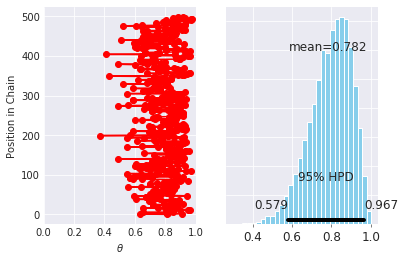

In [30]:
ig, ax = plt.subplots(1, 2)
ax[0].plot(theta_sample[:500], np.arange(500), marker='o', color='red')
ax[0].set_xlim(0, 1)
ax[0].set_xlabel(r'$\theta$')
ax[0].set_ylabel('Position in Chain')

pm.plot_posterior(theta_sample, ax=ax[1], color='skyblue');

Predict using the posterior values

In [32]:
y_pred = np.zeros(len(theta_sample))

In [33]:
for i, p_head in enumerate(theta_sample):
    y_pred[i] = np.random.choice([0, 1], p=[1-p_head, p_head])

Text(0.782, 0.7818360624855989, 'mean(y) = 0.78\nmean($\\theta$) = 0.78')

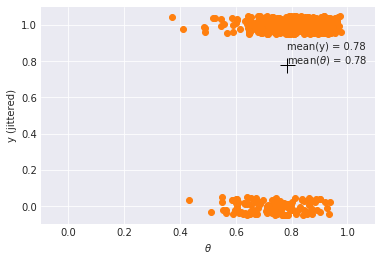

In [39]:
y_pred_jittered = y_pred + np.random.uniform(-.05, .05, size=len(theta_sample))

# Now plot the jittered values:
plt.figure()
plt.plot(theta_sample[:500], y_pred_jittered[:500], 'C1o')
plt.xlim(-.1, 1.1)
plt.ylim(-.1, 1.1)
plt.xlabel(r'$\theta$')
plt.ylabel('y (jittered)')

mean_y = np.mean(y_pred)
mean_theta = np.mean(theta_sample)

plt.plot(mean_y, mean_theta, 'k+', markersize=15)
plt.annotate('mean(y) = %.2f\nmean($\\theta$) = %.2f' %
    (mean_y, mean_theta), xy=(mean_y, mean_theta))
